In [1]:
import arviz as az
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def readcdf(filename):
    return az.InferenceData.from_netcdf(filename)

In [52]:
crt = readcdf("merged_22165212.cdf")

In [53]:
crt.posterior

<xarray.Dataset>
Dimensions:                (chain: 1, draw: 8250)
Coordinates:
  * chain                  (chain) int64 0
  * draw                   (draw) int64 0 1 2 3 4 5 ... 8245 8246 8247 8248 8249
Data variables:
    cycle_time             (chain, draw) float64 ...
    high_enrichment_grade  (chain, draw) float64 ...
Attributes:
    created_at:                 2021-07-16 14:09:36.481216
    arviz_version:              0.11.2
    inference_library:          pymc3
    inference_library_version:  3.11.2
    previous_created_at:        ['2021-07-16 14:09:36.481216', '2021-07-16T11...

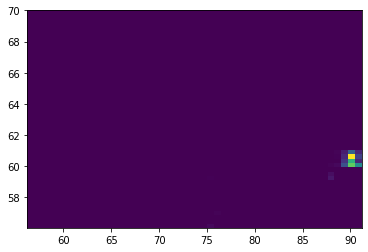

In [44]:
plt.hist2d(crt.posterior.high_enrichment_grade[1], crt.posterior.cycle_time[1], bins=50);

In [45]:
df = crt.to_dataframe()

In [46]:
sum(~np.isnan(df[('posterior', 'cycle_time')]))

10000

In [47]:
df = df.rename(columns={('posterior', 'cycle_time'): 'cycle_time', ('posterior', 'high_enrichment_grade'): 'high_enrichment_grade'})

No handles with labels found to put in legend.


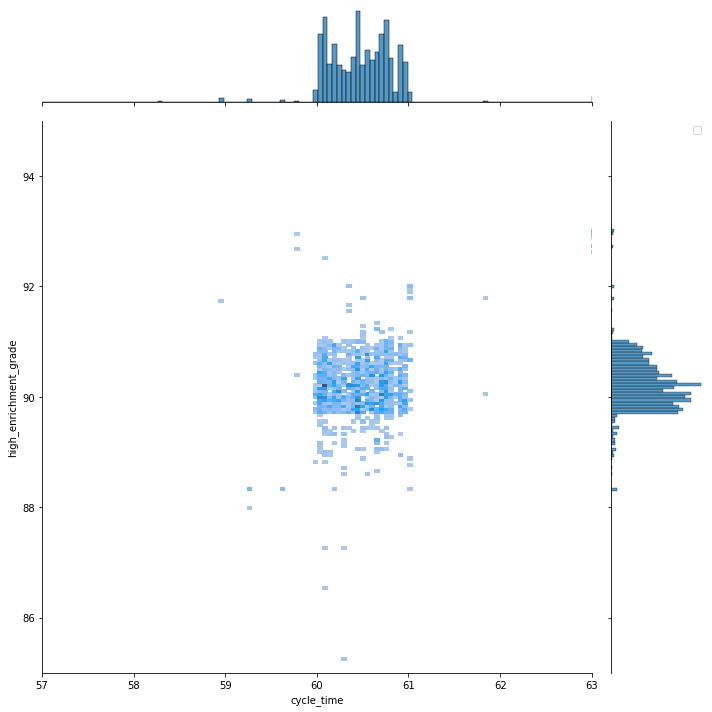

In [48]:
sb.jointplot(data=df, x='cycle_time', y='high_enrichment_grade', kind='hist', xlim=(57,63), ylim=(85, 95), height=10)
plt.legend()
plt.savefig('cyclerichment_sb_hist.png')

In [1]:
az.plot_density(crt, grid=(2,1))

NameError: name 'az' is not defined

In [2]:
import numpy as np

In [4]:
def cartprod(dims, acc=[]):
    if len(dims) == 0:
        yield acc
    else:
        for e in dims[0]:
            yield from cartprod(dims[1:], acc=acc+[e])

In [6]:
list(cartprod([[1,2,3], [4,5,6]]))

[[1, 4], [1, 5], [1, 6], [2, 4], [2, 5], [2, 6], [3, 4], [3, 5], [3, 6]]

In [13]:
a = np.zeros((5, 3))
a[0, 0:2] = [1,2]
a[0, 2:]

array([0.])